<a href="https://colab.research.google.com/github/p25-c4/plate_project/blob/main/plate_visual2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [1]:
import pandas as pd
import numpy as np


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [5]:
df = pd.read_csv("/content/drive/MyDrive/PABA/data_file/SCALE불량.csv", encoding = 'euc_kr')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='rolling_method', ylabel='count'>

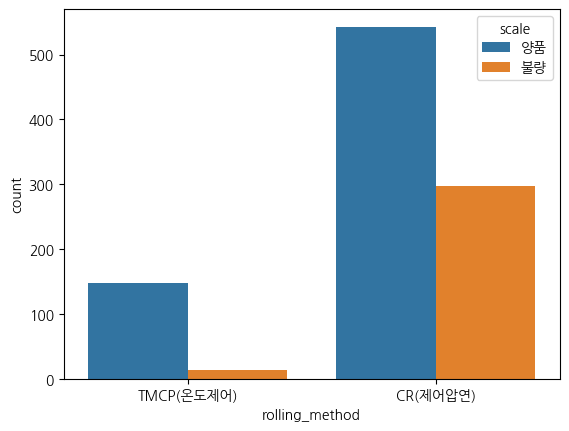

In [8]:
sns.countplot(x='rolling_method', hue = 'scale', data = df)



*   불량률이 제어압연으로 압연한 후판이 불량률이 훨씬 높음
*   제어압연(천천히 냉각), TMCP(급냉시키기)



<Axes: xlabel='steel_kind', ylabel='count'>

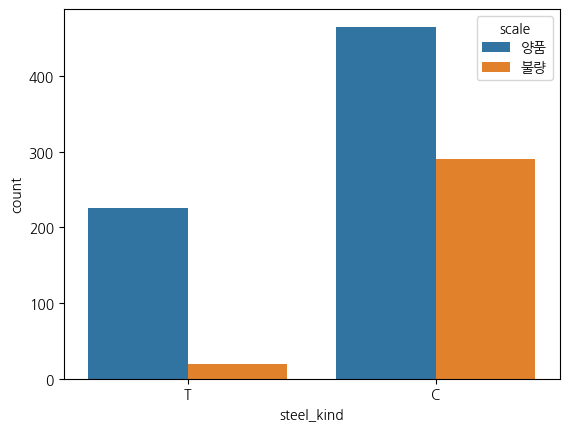

In [9]:
sns.countplot(x='steel_kind', hue = 'scale', data = df)



*   탄소강(C)이 티타늄강(T)보다 훨씬 불량률이 높음.
*   티타늄이 들어가면 철이 산소랑 반응을 못하게 막는게 이유.



In [10]:
# 결측치 처리 후 확인
df.isnull().sum(axis = 0)

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

<Axes: xlabel='work_group', ylabel='count'>

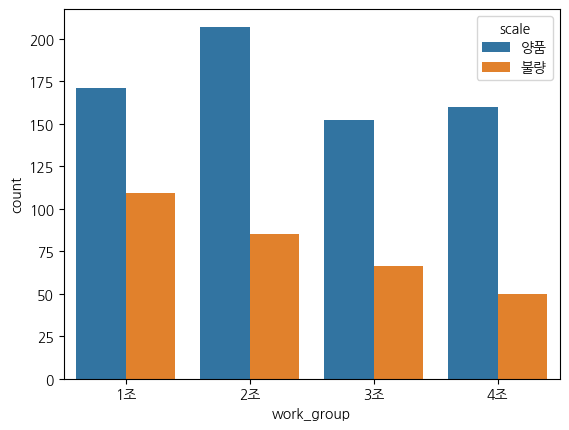

In [11]:
sns.countplot(x='work_group', hue = 'scale', data = df)



*   1조가 만들 때 불량률이 50%가 넘는다.
*   이유가 있는지? 4조 2교대 (7, 19시 기준 변경)
*   다른 변수들과의 관계 더 찾아봐야 연관성을 알 수 있을 듯



<Figure size 5000x5000 with 0 Axes>

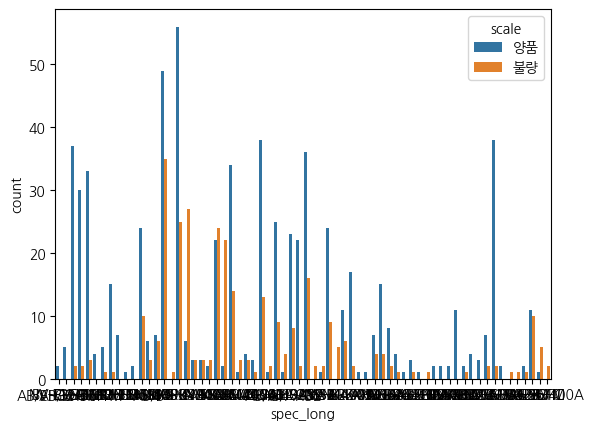

<Figure size 5000x5000 with 0 Axes>

In [13]:
sns.countplot(x='spec_long', hue = 'scale', data = df)

In [21]:
grouped = df.groupby(['spec_long', 'scale']).size().unstack(fill_value=0)
bad_more_than_good = grouped[grouped['불량'] > grouped['양품']].index.tolist()
bad_more_than_good

['A131-DH36TM',
 'A283-C',
 'A516-60',
 'BV-AH36-TM',
 'CCS-B',
 'JS-SM400A',
 'JS-SM490A',
 'JS-SM490YA',
 'JS-SS400',
 'KR-A',
 'KR-B',
 'KS-SM400A',
 'KS-SM490A',
 'KS-SS400',
 'LR-EH32-TM',
 'NV-B']



*   일부 항목들은 불량이 더 많은것도 있음
*   어떻게 빼내죠?  
    -> 하지만 빼냈죠?




<Axes: xlabel='spec_country', ylabel='count'>

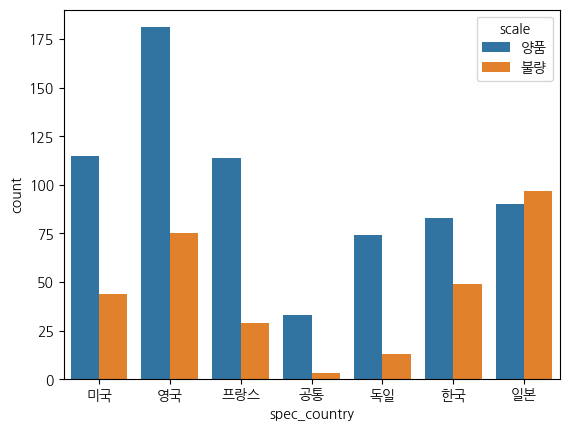

In [22]:
sns.countplot(x='spec_country', hue = 'scale', data = df)



*   일본으로 수출하는건 불량품이 더 많음
*   이유가 뭘까...?
*   영국, 한국도 비율로 하면 반 넘거나 거의 50%임



<Axes: xlabel='fur_no', ylabel='count'>

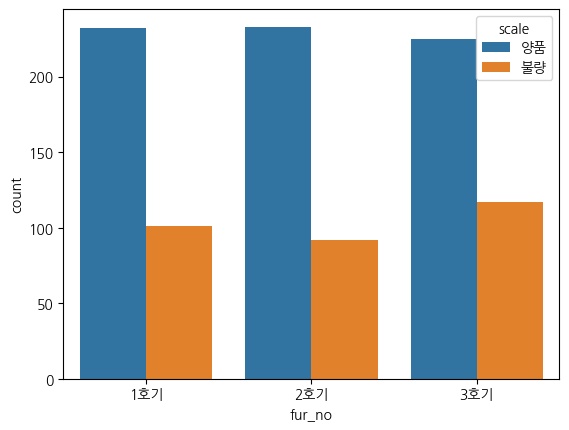

In [ ]:
sns.countplot(x='fur_no', hue = 'scale', data = df)



*   가열로 호기에 따라 불량률이 크게 차이나지 않음



<Axes: xlabel='fur_input_row', ylabel='count'>

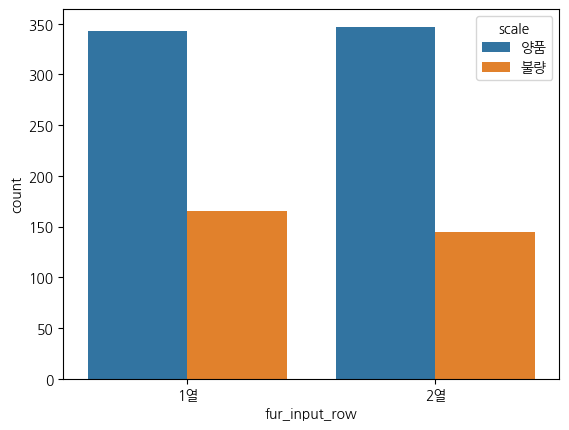

In [ ]:
sns.countplot(x='fur_input_row', hue = 'scale', data = df)



*   가열로 장입열과 불량률은 크게 차이나지 않음
*   이거는 아마도 온도나 시간이랑 차이날거같음  
    -> 다른 변수들과 비교를 해야 유의미한 결과가 나올거같음.



<Axes: xlabel='scale', ylabel='fur_heat_temp'>

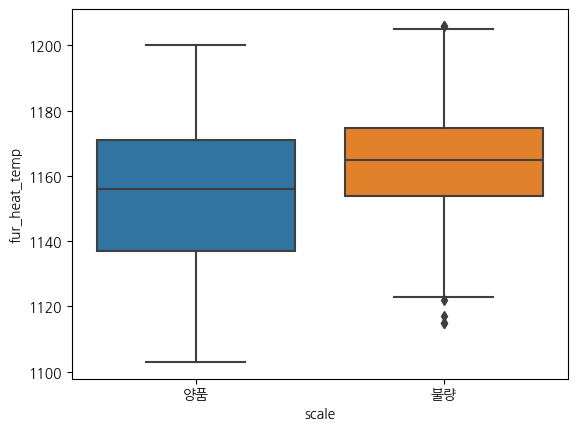

In [ ]:
sns.boxplot(y = 'fur_heat_temp', x = 'scale' , data = df )



*   가열로 가열대 소재온도 (들어갔을 때를 기준이라고 판단)
*   가열대 소재온도랑 불량 유무를 결정하기엔 어렵다고 판단됨  
    -> 각각의 중앙값이나 1사분위, 3사분위 수가 한쪽으로 몰려져 있지 않기 때문



<Axes: xlabel='scale', ylabel='fur_heat_time'>

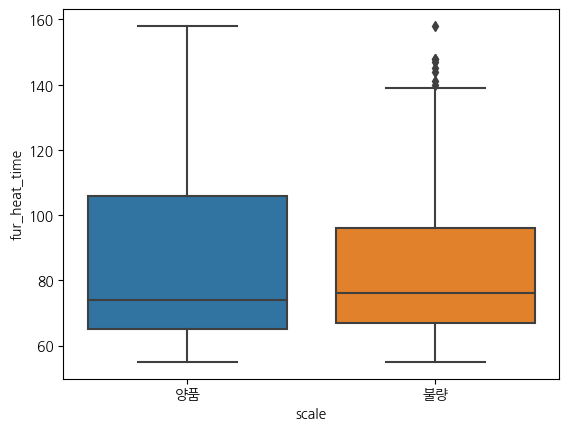

In [ ]:
sns.boxplot(y = 'fur_heat_time', x = 'scale' , data = df )



*   먼 뜻임?
*   중앙값을 중심으로 값의 분포가 비대칭  
    -> 교수님이 그렇게 말고 어쩌고.. 하셨는데...
*   중앙값이 평균보다 작다.
*   정규분포 모형 안되죠?





<Axes: xlabel='scale', ylabel='fur_heat_temp'>

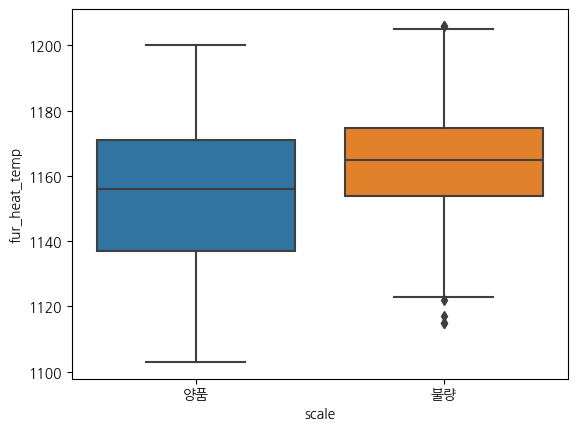

In [ ]:
sns.boxplot(y = 'fur_heat_temp', x = 'scale' , data = df )

<Axes: xlabel='scale', ylabel='fur_soak_temp'>

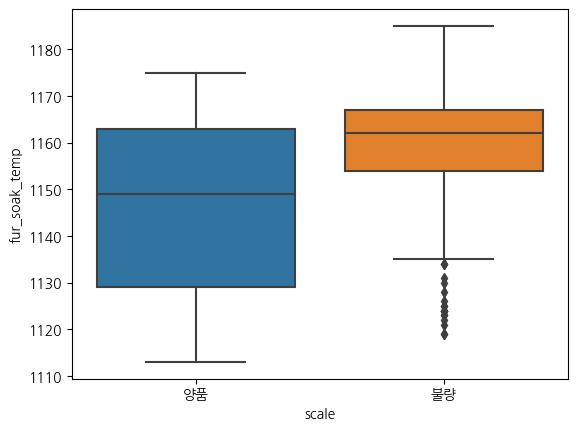

In [ ]:
sns.boxplot(y = 'fur_soak_temp', x = 'scale' , data = df )



*   불량의 이상치가 너무 많다!!
*   불량인 친구들은 대부분 균열대로 갔을 때 온도가 높은 아이들이 불량일 확률?



<Axes: xlabel='scale', ylabel='fur_total_time'>

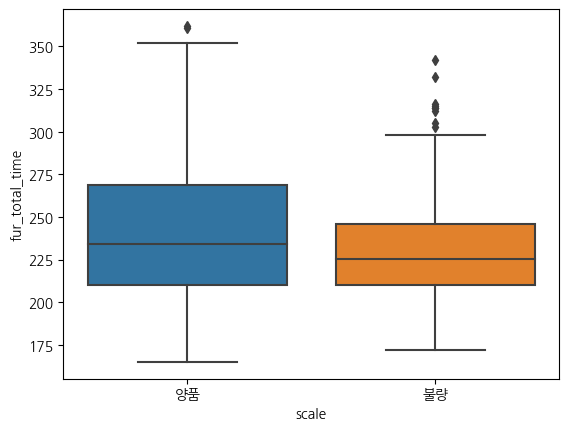

In [ ]:
sns.boxplot(y = 'fur_total_time', x = 'scale' , data = df )

<Axes: xlabel='scale', ylabel='fur_ex_temp'>

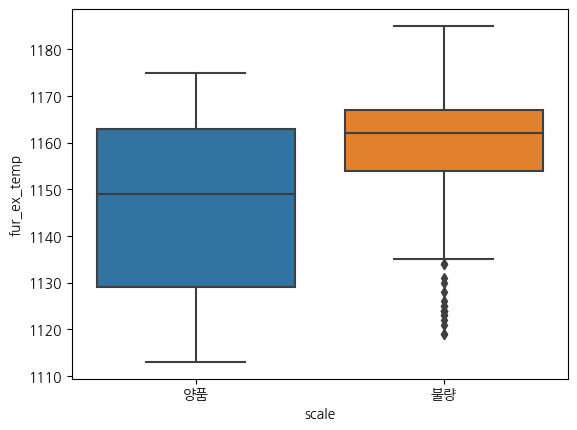

In [ ]:
sns.boxplot(y = 'fur_ex_temp', x = 'scale' , data = df )

<Axes: xlabel='scale', ylabel='rolling_temp'>

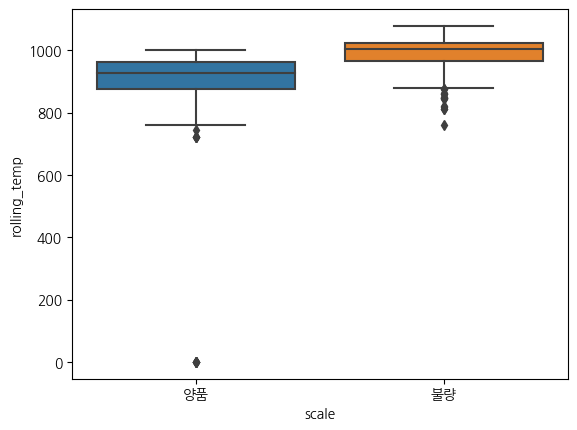

In [ ]:
sns.boxplot(y = 'rolling_temp', x = 'scale' , data = df )

양품에 쓰레기 온도 하나있음

<Axes: xlabel='fur_heat_temp', ylabel='Count'>

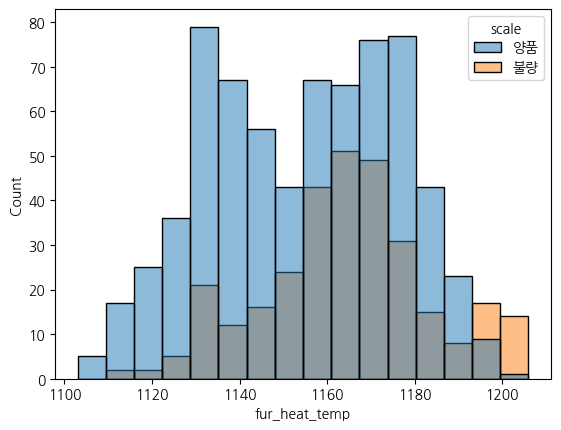

In [ ]:
sns.histplot(x = 'fur_heat_temp', hue = 'scale' , data = df)

<Axes: xlabel='fur_heat_time', ylabel='Count'>

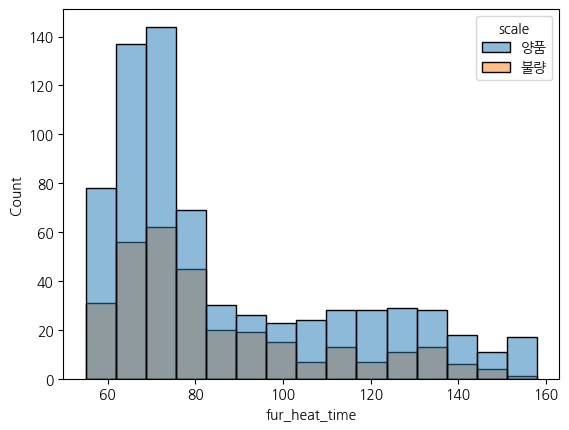

In [ ]:
sns.histplot(x = 'fur_heat_time', hue = 'scale' , data = df)